<header style="padding:1px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>Teradataml Python Basics</b>
</header>

<table>
    <tr>
        <td width = '50%' style = 'vertical-align:top;font-size:16px;font-family:Arial'><br><p>Teradataml is a library that allows python programmers and developers to access the power of Vantage.</p>
            <p>Developers can use common data management functions and methods based on Python Pandas.  Teradataml translates python directives to underlying SQL in order to process directly on the Vantage system without costly data movement.</p>
        <p>Additionally, teradataml provides simple functions providing access to machine learning, open analytics frameworks, and powerful advanced analytical capabilities.</td>
        <td><img src = 'images/Functional_Diagram.png' style = 'width:300px'></td>
    </tr>
    </table>




<p style = 'font-size:16px;font-family:Arial'>This notebook will cover the very basics of the Teradataml package.  Please see the Getting Started Guide online <a href = 'https://docs.teradata.com/r/Teradata-Package-for-Python-User-Guide/November-2021/Introduction-to-Teradata-Package-for-Python'>here</a></p>

<p style = 'font-size:16px;font-family:Arial'><b>Contents</b></p>
<ol style = 'font-size:16px;font-family:Arial'>
<li>Connecting to Vantage
    <ul>
        <li>Initiate a connection to Vantage</li>
    </ul>
</li>    
<li>Teradatml Basics
    <ul>
        <li>Create a Teradata DataFrame (virtual DataFrame)</li>
        <li>Aggregations</li>
        <li>Transformations</li>
        <li>SQL Functions</li>
        <li>Joins</li>
        <li>Bring the data to the client - Pandas</li>
        <li>Cleanup</li>
    </ul>
</li>
<hr>

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>Experience</b></p>


<p style = 'font-size:16px;font-family:Arial'>This demo takes about 5 minutes to run.</p>

<p style = 'font-size:16px;font-family:Arial'>Upgrade to latest version of Teradatml before importing it.</p>

In [2]:
!pip install --upgrade teradataml --user

     |████████████████████████████████| 3.3 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 2.4 MB/s  eta 0:00:01


In [3]:
# getpass to ask password to user and prevent storing it plain in the Notebook
import getpass
import pandas as pd
import tdconnect
# import all Teradataml functions and supporting libraries
from teradataml import *

from sqlalchemy import func

<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'> Accessing the Data
<p style = 'font-size:16px;font-family:Arial'>These demos will work either with foreign tables accessed from Cloud Storage via NOS or you may import the tables to your machine. If you import data for multiple demos, you may need to use the Data Dictionary "Manage Your Space" routine to cleanup tables you no longer need. 
    
<p style = 'font-size:16px;font-family:Arial'>Use the link below to access the 2 options for using data from the data dictionary notebook:

[Click Here to get data for this notebook](../Data_Dictionary/Data_Dictionary.ipynb#TRNG_DataScienceExploration)

[Click Here to Manage Your Space](../Data_Dictionary/Data_Dictionary.ipynb#Manage_Your_Space)

<hr>
<b style = 'font-size:28px;font-family:Arial;color:#E37C4D'>Initiate a connection to Vantage</b>

<p style = 'font-size:18px;font-family:Arial;color:#E37C4D'><b>Make changes for your execution</b></p>

<p style = 'font-size:16px;font-family:Arial'>The Jupyter Module for Teradata provides a helper library called tdconnect - this can use the underlying client configs and pass a JWT token for SSO. Establish connection to Teradata Vantage server (uses the Teradata SQL Driver for Python). Before you execute the following statement, replace the variables &ltHOSTNAME&gt, &ltUID&gt and &ltPWD&gt with your target Vantage system hostname (or IP address), and your database user ID(QLID) and password, respectively.</p>
    
<p style = 'font-size:14px;font-family:Arial'>td_context = create_context(host="tdprdX.td.teradata.com", username="xy123456", password=gp.getpass(prompt='Password:'), logmech="LDAP")</p>
<hr>

In [4]:
eng = tdconnect.create_context('Vantage-LIVE')

print(type(eng))

<class 'sqlalchemy.engine.base.Engine'>


<hr>
<b style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Create a Teradata DataFrame (virtual DataFrame)</b>
<p style = 'font-size:16px;font-family:Arial'>The teradataml DataFrame module function can create a pointer to a table or a SQL statement in the target Vantage system.  Note, no data is copied back to the client, and all operations on the data are translated to SQL and executed in Vantage.</p>

In [5]:
tdf = DataFrame('"TRNG_DataScienceExploration"."HOUSE_PRICES"')

<p style = 'font-size:16px;font-family:Arial'>Extract a few rows - note, only the rows needed to satisfy the head() method are returned to the client</p>

In [6]:
tdf.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,2015/04/18,525000.0,3,1.75,1600.0,9579.0,1.0,0,0,3,8,1180.0,420.0,1977,0,98072,47.7662,-122.15899999999999,1750.0,9829.0
4,2014/09/05,835000.0,4,2.75,3130.0,13412.0,2.0,0,0,3,9,2140.0,990.0,1993,0,98052,47.6993,-122.102,2260.0,9984.0
5,2014/08/11,3000000.0,3,3.5,4410.0,10756.0,2.0,1,4,3,11,3430.0,980.0,2014,0,98056,47.5283,-122.205,3550.0,5634.0
6,2014/07/30,790000.0,2,3.0,2560.0,982278.0,1.0,0,0,3,8,2560.0,0.0,2004,0,98014,47.6955,-121.861,1620.0,40946.0
8,2014/07/17,775000.0,4,3.5,4130.0,77832.0,2.0,0,2,3,10,4130.0,0.0,2011,0,98042,47.3229,-122.045,4130.0,87476.0
9,2015/01/23,600000.0,3,1.0,970.0,4800.0,1.0,0,0,3,6,970.0,0.0,1950,0,98112,47.6212,-122.29799999999999,1500.0,2042.0
7,2014/10/10,359500.0,4,1.75,2030.0,7210.0,1.0,0,0,3,7,1450.0,580.0,1968,0,98059,47.5067,-122.164,1750.0,8387.0
3,2014/11/20,355000.0,3,2.25,2550.0,9674.0,1.0,0,0,3,7,1850.0,700.0,1959,0,98178,47.4856,-122.24700000000001,2240.0,9674.0
1,2015/02/18,265000.0,2,1.0,620.0,4760.0,1.0,0,0,3,6,620.0,0.0,1941,0,98126,47.5286,-122.376,620.0,4760.0
0,2014/09/17,270000.0,3,2.5,1808.0,19200.0,1.0,0,0,3,8,1808.0,0.0,2005,0,98001,47.2598,-122.281,1450.0,14400.0


<p style = 'font-size:16px;font-family:Arial'>Look at the underlying query by using the show_query() method.</p>

In [7]:
tdf.head().show_query()

'select id,"date",price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,"view",condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,"long",sqft_living15,sqft_lot15 from (select * from (select row_number() over (order by "id" asc) - 1 as tdml_row_num, id,"date",price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,"view",condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,"long",sqft_living15,sqft_lot15 from "TRNG_DataScienceExploration"."HOUSE_PRICES") as temp_table where tdml_row_num < 10) as temp_table'

In [8]:
# Describe the table - calculate statistics and return that data to the client
tdf.describe()

func,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
50%,39999.5,450000,3,2.25,1920,7632,1.5,0,0,3,7,1560,0,1975,0,47.572,-122.23,1850,7620
count,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000
mean,39999.5,540313.735,3.373,2.116,2082.22,14907.457,1.494,.007,.236,3.407,7.66,1790.423,291.797,1971.077,82.598,47.56,-122.214,1990.107,12685.019
min,0,75000,0,0,290,520,1,0,0,1,1,290,0,1900,0,47.156,-122.519,399,651
max,79999,7700000,33,8,13540,1651359,3.5,1,4,5,13,9410,4820,2015,2015,47.778,-121.315,6210,871200
75%,59999.25,646000,4,2.5,2550,10687.25,2,0,0,4,8,2220,560,1997,0,47.678,-122.125,2370,10087.25
25%,19999.75,323000,3,1.75,1430,5060,1,0,0,3,7,1200,0,1951,0,47.472,-122.327,1490,5102
std,23094.155,366879.912,.925,.77,919.312,38926.134,.539,.086,.769,.648,1.181,829.504,442.005,29.331,397.534,.139,.141,687.426,26335.333


<hr>
<b style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Aggregations</b>
<p style = 'font-size:16px;font-family:Arial'>Various aggregations are available for grouping, windowing, time series, etc.</p>

In [9]:
# simple groupby:
tdf.groupby('bedrooms').sum()

bedrooms,sum_id,sum_price,sum_bathrooms,sum_sqft_living,sum_sqft_lot,sum_floors,sum_waterfront,sum_view,sum_condition,sum_grade,sum_sqft_above,sum_sqft_basement,sum_yr_built,sum_yr_renovated,sum_lat,sum_long,sum_sqft_living15,sum_sqft_lot15
4,1019844957,16301086053.0,62368.5,65424096.0,412236835.0,41431.0,139,6963,87124,207941,56370678.0,9053418.0,50570271,2190073,1216592.3188,-3125853.9239999996,58792008.0,345322898.0
5,234346016,4617271210.0,16405.25,17906919.0,97840150.0,9275.5,80,2513,20202,48690,14167322.0,3739597.0,11614468,579120,279822.40869999997,-718790.795,14381929.0,76574317.0
10,298414,8024000.0,32.75,36970.0,91651.0,17.0,0,6,37,76,25120.0,11850.0,19595,0,476.03079999999994,-1221.9989999999998,21780.0,90091.0
1,29306668,233682202.0,779.75,650240.0,10788104.0,840.5,17,159,2406,4473,601600.0,48640.0,1429554,117052,35010.291000000005,-89983.60500000001,1055478.0,9404172.0
0,1998988,19770550.0,49.0,84984.0,2448908.0,103.0,0,12,163,365,84984.0,0.0,109308,0,2612.052199999999,-6720.894000000001,108440.0,2609393.0
8,1627132,48891000.0,168.75,174960.0,422048.0,81.0,0,3,165,376,126350.0,48610.0,93552,0,2285.1252999999997,-5868.058,95050.0,330527.0
2,414831020,4085481309.0,14300.0,12603069.0,116516551.0,13294.0,110,1811,34584,70113,11277779.0,1325290.0,19992442,823269,486687.8670000001,-1250559.2090000005,15334468.0,96750024.0
9,1131120,22127997.0,114.5,97430.0,141660.0,56.5,0,0,81,200,75900.0,21530.0,52151,6030,1286.4772,-3302.4210000000003,55510.0,109793.0
3,1447565091,16893789142.0,71355.25,65565041.0,528277393.0,52440.5,234,6742,123579,270749,57416953.0,8148088.0,71429266,2686783,1722407.6264999995,-4426770.556999999,66585682.0,464453750.0
33,98437,1280000.0,3.5,3240.0,12000.0,2.0,0,0,10,14,2080.0,1160.0,3894,0,95.3756,-244.662,2660.0,9400.0


In [10]:
# Groupby using the agg() method
#  Valid aggregation  valuse are 'count', 'sum', 'min', 'max', 'mean', 'std', 'percentile', 'unique','median', 'var'
tdf.groupby('bedrooms').agg(['count', 'sum'])

bedrooms,count_id,sum_id,count_date,count_price,sum_price,count_bathrooms,sum_bathrooms,count_sqft_living,sum_sqft_living,count_sqft_lot,sum_sqft_lot,count_floors,sum_floors,count_waterfront,sum_waterfront,count_view,sum_view,count_condition,sum_condition,count_grade,sum_grade,count_sqft_above,sum_sqft_above,count_sqft_basement,sum_sqft_basement,count_yr_built,sum_yr_built,count_yr_renovated,sum_yr_renovated,count_zipcode,count_lat,sum_lat,count_long,sum_long,count_sqft_living15,sum_sqft_living15,count_sqft_lot15,sum_sqft_lot15
1,736,29306668,736,736,233682202.0,736,779.75,736,650240.0,736,10788104.0,736,840.5,736,17,736,159,736,2406,736,4473,736,601600.0,736,48640.0,736,1429554,736,117052,736,736,35010.29099999999,736,-89983.60500000001,736,1055478.0,736,9404172.0
0,55,1998988,55,55,19770550.0,55,49.0,55,84984.0,55,2448908.0,55,103.0,55,0,55,12,55,163,55,365,55,84984.0,55,0.0,55,109308,55,0,55,55,2612.0521999999996,55,-6720.894,55,108440.0,55,2609393.0
2,10227,414831020,10227,10227,4085481309.0,10227,14300.0,10227,12603069.0,10227,116516551.0,10227,13294.0,10227,110,10227,1811,10227,34584,10227,70113,10227,11277779.0,10227,1325290.0,10227,19992442,10227,823269,10227,10227,486687.8670000001,10227,-1250559.2090000005,10227,15334468.0,10227,96750024.0
8,48,1627132,48,48,48891000.0,48,168.75,48,174960.0,48,422048.0,48,81.0,48,0,48,3,48,165,48,376,48,126350.0,48,48610.0,48,93552,48,0,48,48,2285.1252999999992,48,-5868.058000000001,48,95050.0,48,330527.0
3,36222,1447565091,36222,36222,16893789142.0,36222,71355.25,36222,65565041.0,36222,528277393.0,36222,52440.5,36222,234,36222,6742,36222,123579,36222,270749,36222,57416953.0,36222,8148088.0,36222,71429266,36222,2686783,36222,36222,1722407.6264999993,36222,-4426770.556999999,36222,66585682.0,36222,464453750.0
11,8,166052,8,8,4160000.0,8,24.0,8,24000.0,8,39680.0,8,16.0,8,0,8,0,8,24,8,56,8,19200.0,8,4800.0,8,15344,8,15992,8,8,380.448,8,-978.9040000000002,8,11360.0,8,39680.0
6,1056,43025639,1056,1056,848816795.0,1056,3196.5,1056,3438457.0,1056,20936419.0,1056,1702.0,1056,13,1056,595,1056,3692,1056,8515,1056,2613093.0,1056,825364.0,1056,2072055,1056,173472,1056,1056,50243.345000000016,1056,-129090.16099999998,1056,2419691.0,1056,16894123.0
4,25582,1019844957,25582,25582,16301086053.0,25582,62368.5,25582,65424096.0,25582,412236835.0,25582,41431.0,25582,139,25582,6963,25582,87124,25582,207941,25582,56370678.0,25582,9053418.0,25582,50570271,25582,2190073,25582,25582,1216592.3188000002,25582,-3125853.9240000006,25582,58792008.0,25582,345322898.0
7,145,5720466,145,145,140718545.0,145,517.25,145,568190.0,145,2845168.0,145,251.5,145,0,145,100,145,502,145,1221,145,452770.0,145,115420.0,145,284284,145,16078,145,145,6903.228999999995,145,-17725.07599999999,145,344480.0,145,2213339.0
9,27,1131120,27,27,22127997.0,27,114.5,27,97430.0,27,141660.0,27,56.5,27,0,27,0,27,81,27,200,27,75900.0,27,21530.0,27,52151,27,6030,27,27,1286.4772,27,-3302.421,27,55510.0,27,109793.0


<hr>
<b style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Transformations</b>
<p style = 'font-size:16px;font-family:Arial'>Assign method can be used to create new columns as the result of an expression.</p>

In [11]:
# As with Pandas, the method call returns an object of teradataml DataFrame
# Use self-assignment to create the column in the existing dataframe if desired:

tdf.assign(price_per_bed = tdf['price'] / tdf['bedrooms'])

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_bed
63847,2014/07/28,565000.0,2,1.0,960.0,4080.0,1.0,0,0,5,7,960.0,0.0,1911,0,98103,47.6893,-122.34899999999999,1300.0,4080.0,282500.0
72901,2014/09/05,232000.0,2,1.0,1240.0,12092.0,1.0,0,0,3,6,960.0,280.0,1922,1984,98146,47.4957,-122.352,1820.0,7460.0,116000.0
22329,2014/07/03,312500.0,3,1.75,1830.0,7969.0,1.0,0,0,3,7,930.0,900.0,1950,2008,98055,47.4667,-122.214,1790.0,7425.0,104166.66666666667
15620,2014/05/02,495000.0,4,1.75,1600.0,6380.0,1.0,0,0,3,8,1130.0,470.0,1959,0,98125,47.701,-122.306,1090.0,6380.0,123750.0
69006,2014/08/05,1400000.0,5,3.0,3850.0,14990.0,1.0,0,0,4,9,2290.0,1560.0,1964,0,98004,47.6425,-122.21799999999999,3010.0,15001.0,280000.0
6892,2014/07/25,625000.0,3,1.5,1990.0,5978.0,1.5,1,4,4,7,1990.0,0.0,1926,0,98198,47.3449,-122.329,2100.0,6221.0,208333.33333333334
52978,2015/04/14,505000.0,4,1.0,1480.0,12675.0,1.5,0,0,4,7,1480.0,0.0,1929,0,98133,47.763000000000005,-122.34200000000001,1820.0,7995.0,126250.0
2141,2014/09/18,291000.0,3,2.25,1860.0,13939.0,1.0,0,0,4,7,1860.0,0.0,1961,0,98030,47.3746,-122.21700000000001,1530.0,10018.0,97000.0
47819,2014/09/15,440000.0,4,3.5,3180.0,4869.0,2.0,0,0,3,8,2390.0,790.0,2007,0,98055,47.4482,-122.206,2850.0,4500.0,110000.0
71698,2014/12/17,405300.0,3,2.75,2390.0,7939.0,1.0,0,0,5,7,1610.0,780.0,1983,0,98056,47.4987,-122.166,1920.0,7939.0,135100.0


<hr>
<b style = 'font-size:18px;font-family:Arial;color:#E37C4D'>SQL Functions</b>
<p style = 'font-size:16px;font-family:Arial'>teradataml supports the following categories of SQL functions with SQLAlchemy extension:</p>
<ul style = 'font-size:16px;font-family:Arial'>
    <li>Aggregate Functions</li>
    <li>Arithmetic, Hyperbolic and Trigonometric Functions</li>
<li>Bit Byte Manipulation Functions</li>
<li>Built-In Functions</li>
<li>Hash Related Functions</li>
<li>Regular Expression Functions</li>
<li>String Functions</li>
<li>Window Aggregate Functions</li>
</ul>

<p style = 'font-size:16px;font-family:Arial'><a href = 'https://docs.teradata.com/r/Teradata-Package-for-Python-User-Guide/November-2021/teradataml-Extension-with-SQLAlchemy/Accessing-Vantage-SQL-Functions/Supported-SQL-Functions' >SQL Functions</a></p>


In [12]:
# Pearson Correlation Coefficient - in this example, for our data set,
# what's the correlation between price and square footage?

corr_func = func.corr(tdf['price'].expression, tdf['sqft_living'].expression)


#Setting drop_columns = True here
df_corr = tdf.assign(drop_columns = True, corr_ = corr_func)

print(df_corr)

      corr_
0  0.704988


<hr>
<b style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Joins</b>
<p style = 'font-size:16px;font-family:Arial'>Pandas-Style joins can be used to create SQL joins in Vantage</p>

In [13]:
# Create a new dataframe using a SQL statement

qry = '''
SELECT id,
CASE 
    WHEN waterfront = 0 THEN 'no'
    ELSE 'yes'
END str_waterfront
FROM "TRNG_DataScienceExploration"."HOUSE_PRICES"
'''
tdf_waterfront = DataFrame.from_query(qry)
tdf_waterfront.head()

id,str_waterfront
2,no
4,no
5,yes
6,no
8,no
9,no
7,no
3,no
1,no
0,no


In [14]:
#join these two dataframes together

tdf_joined_data = tdf.join(tdf_waterfront, on = 'id', how = 'left', rsuffix = '_r', lsuffix = '_l')
tdf_joined_data.head()

_l_id,_r_id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,str_waterfront
2,2,2015/04/18,525000.0,3,1.75,1600.0,9579.0,1.0,0,0,3,8,1180.0,420.0,1977,0,98072,47.7662,-122.15899999999999,1750.0,9829.0,no
4,4,2014/09/05,835000.0,4,2.75,3130.0,13412.0,2.0,0,0,3,9,2140.0,990.0,1993,0,98052,47.6993,-122.102,2260.0,9984.0,no
5,5,2014/08/11,3000000.0,3,3.5,4410.0,10756.0,2.0,1,4,3,11,3430.0,980.0,2014,0,98056,47.5283,-122.205,3550.0,5634.0,yes
6,6,2014/07/30,790000.0,2,3.0,2560.0,982278.0,1.0,0,0,3,8,2560.0,0.0,2004,0,98014,47.6955,-121.861,1620.0,40946.0,no
8,8,2014/07/17,775000.0,4,3.5,4130.0,77832.0,2.0,0,2,3,10,4130.0,0.0,2011,0,98042,47.3229,-122.045,4130.0,87476.0,no
9,9,2015/01/23,600000.0,3,1.0,970.0,4800.0,1.0,0,0,3,6,970.0,0.0,1950,0,98112,47.6212,-122.29799999999999,1500.0,2042.0,no
7,7,2014/10/10,359500.0,4,1.75,2030.0,7210.0,1.0,0,0,3,7,1450.0,580.0,1968,0,98059,47.5067,-122.164,1750.0,8387.0,no
3,3,2014/11/20,355000.0,3,2.25,2550.0,9674.0,1.0,0,0,3,7,1850.0,700.0,1959,0,98178,47.4856,-122.24700000000001,2240.0,9674.0,no
1,1,2015/02/18,265000.0,2,1.0,620.0,4760.0,1.0,0,0,3,6,620.0,0.0,1941,0,98126,47.5286,-122.376,620.0,4760.0,no
0,0,2014/09/17,270000.0,3,2.5,1808.0,19200.0,1.0,0,0,3,8,1808.0,0.0,2005,0,98001,47.2598,-122.281,1450.0,14400.0,no


<hr>
<b style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Bring the data to the client - Pandas</b>
<p style = 'font-size:16px;font-family:Arial'>to_pandas method will selectively retrieve data to the client</p>

In [15]:
df = tdf_joined_data.to_pandas(all_rows = True)

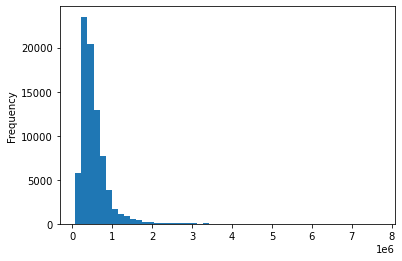

In [16]:
df['price'].plot(kind = 'hist', bins = 50)

<hr>
<b style = 'font-size:18px;font-family:Arial;color:#E37C4D'>Cleanup</b>
<p style = 'font-size:16px;font-family:Arial'>It is a good practice to remove the context that we created to connect to Vantage</p>

In [17]:
remove_context()

True

<footer style="padding:10px;background:#f9f9f9;border-bottom:3px solid #394851">©2022 Teradata. All Rights Reserved</footer>